## 概述

### 本章介绍

本章会给出一些使用朴素贝叶斯分类器。我们称之为“朴素”，是因为整个形式过程只做最原始、最简单的假设。不必担心，你会详细了解到这些假设。我们将充分利用Python的文本处理能力将文档切分成词向量，然后利用词向量对文档进行分类。我们还将构建另一个分类器，观察其在真实的垃圾邮件数据集中的过滤效果，必要时还会回顾一下条件概率。最后，我们将介绍如何从个人发布的大量广告中学习分类器，并将学习结果转换成人类可理解的信息。

前两章要求分类器做出艰难决策，给出 “该数据实例属于哪一类”这类问题的明确答案。不过，分类器有时会产生错误结果，这时可以要求 分类器给出一个最优的类别猜测结果，同时给出这个猜测的概率估计值。

概率论是许多机器学习算法的基础，所以深刻理解这一主题就显得十分重要。第3章在计算特征值取某个值的概率时涉及了一些概率知识，在那里先统计特征在数据集中取某个特定值的次数，然后除以数据集的实例总数，就得到了特征取该值的概率。我们将在此基础上深入讨论。

本章会给出一些使用概率论进行分类的方法。首先从一个最简单的概率分类器开始，然后给出一些假设来学习朴素贝叶斯分类器。称之为“朴素”，是因为整个形式化过程只做最原始、最简单的假设。不必担心，你会详细了解到这些假设。我们将充分利用Python的文本处理能力将文档切分成词向量，然后利用词向量对文档进行分类。我们将还构建另一个分类器，观察其在真实的垃圾邮件中的过滤效果，必要时还会回顾一下条件概率。

### 基于贝叶斯决策理论的分类方法
朴素贝叶斯
优点：在数据较少的情况下仍然有效，可以处理多类别问题。
缺点：对于输入数据的准备方式较为敏感。
适用数据类型：标称型数据。

朴素贝叶斯是贝叶斯决策理论的一部分，所以讲述朴素贝叶斯之前有必要快速了解一下贝叶斯决策理论。

假设现在有一个数据集，它由两类数据组成（红色和蓝色），数据分布如下图所示。

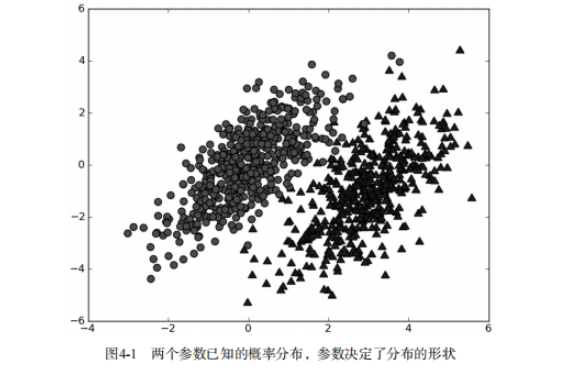

我们现在用 p1(x,y) p1(x,y)p1(x,y) 表示数据点 (x,y) (x,y)(x,y) 属于类别（图中红色圆点表示的类别）的概率，用 p2(x,y) p2(x,y)p2(x,y) 表示数据点 (x,y) (x,y)(x,y) 属于类别2（图中蓝色三角形表示的类别）的概率，那么对于一个新数据点 (x,y) (x,y)(x,y)，可以用下面的规则来判断它的类别：
- 假设p1(x,y)>p2(x,y)，那么类别为1
- 如果p2(x,y)>p1(x,y)，那么类别为2 

也就是说，会 选择高概率所对应的类别。这就是贝叶斯决策理论的核心思想，即选择具有最高概率的决策。回到上图中，如果该图中的整个数据使用6个浮点数（整个数据由两类不同分布的数据构成，有可能只需要6个统计参数来描述）来表示，并且计算类别概率的Python代码只有两行，那么你会更倾向于使用下面哪种方法来对该数据点进行分类？

(1)使用第1章的kNN，进行1000次距离计算；
(2)使用第2章的决策树，分别沿x轴、y轴划分数据；
(3)计算数据点属于每个类别的概率，并进行比较。
使用决策树不会非常成功；而和简单的概率计算相比，kNN的计算量太大。因此，对于上述问题，最佳选择是使用刚才提到的概率比较方法。

接下来，我们必须要详述p1及p1概率计算方法。

贝叶斯？？？

这里使用的概率解释属于贝叶斯概率理论的范畴，该理论非常流行且效果良好。贝叶斯概率以18世纪的一位神学家托马斯·贝叶斯（Thomas Bayes）的名字命名。贝叶斯概率 引入先验知识和逻辑推理 来处理不确定命题。另一种概率解释称为频数概率（frequency probability），它只从数据本身获得结论，并不考虑逻辑推理及先验知识。

## 数学知识准备
 
### 条件概率

接下来花点时间讲讲概率与条件概率。如果你对p(x,y|c_1)符合很熟悉，那么可以跳过本节。

假设现在有一个装了7块石头的罐子，其中3块是灰色的，4块是黑色的。如果从罐子中随机取出一块石头，那么是灰色石头的可能性是多少？由于取石头有7种可能，其中3种为灰色，所以取出灰色石头的概率为3/7。那么取到黑色石头的概率又是多少呢？很显然，是4/7。我们使用P(gray)来表示取到灰色石头的概率，其概率值可以通过灰色石头数目除以总的石头数目来得到。

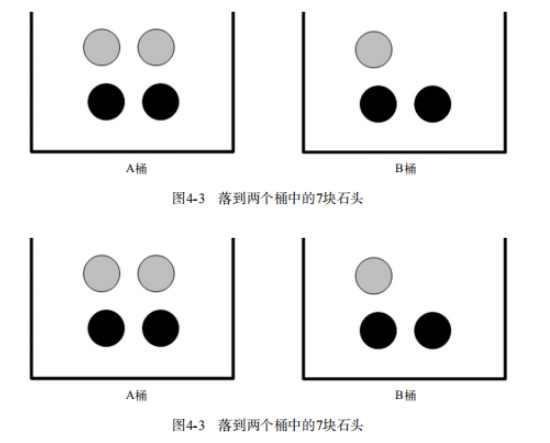

要计算P(gray)或者P(black)，事先得知道石头所在桶的信息会不会改变结果？你有可能已经想到计算从B桶中取到灰色石头的概率的办法，这就是所谓的 条件概率（conditionalprobability）。假定计算的是从B桶取到灰色石头的概率，这个概率可以记作P(gray|bucketB)，我们称之为“在已知石头出自B桶的条件下，取出灰色石头的概率”。不难得到，P(gray|bucketA)值为2/4，P(gray|bucketB) 的值为1/3。

条件概率的计算公式如下所示：
$$p(gray|bucketB)=p(gray and bucketB)/p(bucketB)$$

我们来看看上述公式是否合理：

- 首先，用B桶中灰色石头的个数除以两个桶中总的石头数，得到p(gray and bucketB) = 1/7。
- 其次，由于B桶中有3块石头，而总石头数为7，于是p(bucketB)就等于3/7。
- 最后，有p(gray|bucketB) = p(gray and bucketB)/p(bucketB) =(1/7) / (3/7) = 1/3

这个公式虽然对于这个简单例子来说有点复杂，但当存在更多特征时是非常有效的。用代数方法计算条件概率时，该公式也很有用。

另一种有效计算条件概率的方法称为 贝叶斯准则。贝叶斯准则告诉我们如何交换条件概率中的条件与结果，即如果已知p(x|c)，要求p(c|x)，那么可以使用下面的计算方法：

$$p(c|x)=\frac{p(x|c)*p(c)}{p(x)}$$

### 全概率

条件概率（Condittional probability），就是指在事件B发生的情况下，事件A发生的概率，可以用p(A|B)

$$p(A|B)=\frac{p(A \cap B)}{p(B)}$$

$$p(A \cap B)=p(A|B)*p(B)$$
又因为：
$$p(A \cap B) = p(B|A)*p(A)$$
所以：

$$p(A|B) = \frac{p(B|A)*P(A)}{P(B)}$$

全概率公式：若事件A1，A2，…，An构成一个完备事件组且都有正概率，则对任意一个事件B都有公式成立。
$$p(B)=p(BA_1)+P(BA_2)+...+P(BA_n)$$
$$=p(B|A_1)*P(A_1)+p(B|A_2)*P(A_2)+...+p(B|A_n)*P(A_n)$$
$$=\sum_{i=1}^n p(A_i)*p(B|A_i)$$

$$p(B)=\sum_{i=1}^n p(A_i)*p(B|A_i)$$

### 使用条件概率来进行分类

假设这里要被分类的类别有两类，类c1和类c2，那么我们需要计算概率p1(x,y)和p2(x,y)的大小并进行比较：

若p1(x,y)>p2(x,y)，那么属于类别1

若p1(x,y)<p2(x,y)，那么属于类别2

使用p1()和p2()只是为了尽可能简化描述，而真正需要计算和比较的是p(c1|x,y)和p(c2|x,y)。这些符号所代表的具体意义是：给定某个由x、y表示的数据点，那么该数据点来自类别c1的概率是多少？数据点来自类别c2的概率又是多少？。

$$p(c_i|x,y)=\frac{p(x,y|c_i)*p(c_i)}{p(x,y)}$$

若p(c1|x,y)>p(c2|x,y)，那么属于类别c1

若p(c1|x,y)<p(c2|x,y)，那么属于类别c2

使用贝叶斯准则，可以通过已知的三个概率值来计算未知的概率值。后面就会给出利用贝叶斯准则来计算概率并对数据进行分类的代码。

## 使用朴素贝叶斯进行文档分类

机器学习的一个重要应用就是文档的自动分类。在分类文档中，整个文档（如一封电子邮件）是实例，而电子邮件中的某些元素则构成特征。虽然电子邮件是一种会不断增加的文本，但我们同样也可以对新闻报道、用户留言、政府公文等其他任意类型的文本进行分类。我们可以观察文档中出现的词，并把每个词的出现或者不出现作为一个特征，这样得到的特征数目就会跟词汇表中的词目一样多。

### 使用Python进行文本分类

要从文本中获取特征，需要先拆分文本。具体如何做呢？这里的特征是来自文本的词条（token），一个词条是字符的任意组合。可以把词条想象为单词，也可以是非单词词条，如URL、IP地址或者任意其他字符串。然后将每一个文本片段表示为一个词条向量，其中值为1表示出现在文档中，0表示词条未出现。

接下来首先给出将文本转换为数字向量的过程，然后介绍如何基于这些向量来计算条件概率，并在此基础上构建分类器，最后还要介绍一些利用Python实现朴素贝叶斯过程中需要考虑的问题。

### 从文本中构建词向量

我们将文本看成单词向量或者词条向量，也就是说句子转换为向量。考虑出现在所有文档中的所有单词，在决定将哪些词纳入词汇表或者说所要的词汇集合。

In [1]:
def loadDataSet():
    '''
    函数功能：
            创建数据集
    函数参数：
            无
    函数返回：
            返回创建成功的数据集，类别标签
    '''
    # 每一行代表一个文档
    postingList=[['my', 'dog', 'has', 'flea', 'problems', 'help', 'please'],         # 创建数据
                 ['maybe', 'not', 'take', 'him', 'to', 'dog', 'park', 'stupid'],
                 ['my', 'dalmation', 'is', 'so', 'cute', 'I', 'love', 'him'],
                 ['stop', 'posting', 'stupid', 'worthless', 'garbage'],
                 ['mr', 'licks', 'ate', 'my', 'steak', 'how', 'to', 'stop', 'him'],
                 ['quit', 'buying', 'worthless', 'dog', 'food', 'stupid']]
    classVec = [0,1,0,1,0,1]               # 由人工标注的每篇文档的类标签，1代表侮辱类词汇，0代表非侮辱类词汇
    return postingList,classVec            # 返回数据集，类别标签

# 函数测试
postingList, classVec = loadDataSet()
print(postingList)
print('\n')
print(classVec)

[['my', 'dog', 'has', 'flea', 'problems', 'help', 'please'], ['maybe', 'not', 'take', 'him', 'to', 'dog', 'park', 'stupid'], ['my', 'dalmation', 'is', 'so', 'cute', 'I', 'love', 'him'], ['stop', 'posting', 'stupid', 'worthless', 'garbage'], ['mr', 'licks', 'ate', 'my', 'steak', 'how', 'to', 'stop', 'him'], ['quit', 'buying', 'worthless', 'dog', 'food', 'stupid']]


[0, 1, 0, 1, 0, 1]


In [2]:
def createVocabList(dataSet):
    '''
    函数功能：
            创建一个包含在所有文档中出现的不重复词的词表
    函数参数：
            dataSet__数据集
    函数返回：
            不重复词的列表
    '''
    vocabSet = set([])                       #创建一个空的不重复列表(存放词条)
    for document in dataSet:                 # 遍历dataSet中的每一篇文档
        vocabSet = vocabSet | set(document)  # 与vocabSet取并集，向vocabSet中添加没有出现的新词条    
    return list(vocabSet)                    # 将集合转化为列表

# 函数测试
postingList,classVec  =loadDataSet()
print(createVocabList(postingList))

['food', 'problems', 'take', 'not', 'to', 'dog', 'park', 'please', 'him', 'love', 'is', 'garbage', 'worthless', 'licks', 'how', 'so', 'I', 'steak', 'help', 'has', 'my', 'posting', 'mr', 'quit', 'maybe', 'stupid', 'cute', 'ate', 'flea', 'buying', 'stop', 'dalmation']


函数createVocabList()创建了一个包在所有文档中出现的不重复词的列表。

In [3]:
def setofWords2Vec(vocabList, inputSet):
    '''
    函数说明：
            根据vocabList词汇表，将inputSet进行向量化(出现的词表示为1，否则为0)
    函数参数：
            vocabList__词汇表
            inputSet__词条数据每一个列表向量
    '''
    returnVec = [0] * len(vocabList)                               #创建一个其中所含元素都为0的向量
    for word in inputSet:                                          #遍历每个词条
        if word in vocabList:                                      #如果词条存在于词汇表中，则置1
            returnVec[vocabList.index(word)] = 1
        else: 
            print("the word: %s is not in my Vocabulary!" % word)
    return returnVec                                               # 返回文档向量

# 函数测试
postingList, classVec = loadDataSet()
vocabList = createVocabList(postingList)
print(setofWords2Vec(vocabList,postingList[0] ))

[0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]


获得词汇表后，可以使用函数setofWords2Vec()，该函数的输入参数为词汇表及某个文档，输出的是文档向量，向量的每一元素为1为0，分别表示词汇表中的单词在输入文档中是否出现。

### 训练算法：从词向量计算概率

这里将之前的x、y替换为w。粗体w表示这是一个向量，即它，即它由多个数值组成。数值的个数与词汇表中的词个数相同

$$p(c_i|w)=\frac{p(w|c_i)*p(c_i)}{p(w)}$$

具体地，首先，可以通过统计各个类别的文档数目除以总得文档数目，计算出相应的p(ci)；然后，基于条件独立性假设，将w展开为一个个的独立特征，那么就可以将上述公式写为$p(w|c_i)=p(w0|c_i)*p(w1|c_i)*...p(w_N|c_i)$,这样就很容易计算，从而极大地简化了计算过程。

In [4]:
import numpy as np
def trainNB0(trainMatrix,trainCategory):
    '''
    函数功能：
            利用朴素贝叶斯训练算法
    函数参数：
            trainMatrix__文档矩阵
            trainCategory__每篇文档类别标签所构成的向量
    函数返回：
            p0v__非侮辱类的条件概率
            p1v__侮辱类的条件概率
            pAb__文档属于侮辱类的概率
    '''
    numTrainDocs = len(trainMatrix)                       #计算训练的文档数目
    numWords = len(trainMatrix[0])                        #计算每篇文档的词条数
    pAbusive = sum(trainCategory)/float(numTrainDocs)     #文档属于侮辱类的概率
    p0Num = np.zeros(numWords)
    p1Num = np.zeros(numWords)                            # 创建一个长度和词条数等长的列表
    p0Denom = 0.0                                         # 初始化为0
    p1Denom = 0.0                                         # 初始化为0
    for i in range(numTrainDocs):                         # 遍历每一篇文档的词条向量
        if trainCategory[i] == 1:                         # 如果该词条向量对应的标签为1
            p1Num += trainMatrix[i]                       # 统计所有文档中类别标签为1的词条向量中各个词条出现的次数
            p1Denom += sum(trainMatrix[i])                # 统计所以文档类别标签为1的词条向量中出现的所有词条的数目
        
         # 统计属于侮辱类的条件概率所需的数据
        else:                     
            p0Num += trainMatrix[i]                       # 统计所有文档中类别标签为0的词条向量中各个词条出现的次数
            p0Denom += sum(trainMatrix[i])                # 统计所以文档类别标签为0的词条向量中出现的所有词条的数目
    p1Vect = p1Num/p1Denom                                # 为避免下溢出问题，后面会改为np.log()                   
    p0Vect = p0Num/p0Denom                                # 为避免下溢出问题，后面会改为log()
    return p0Vect,p1Vect,pAbusive                         # 函数返回


# 函数测试
postingList, classVec = loadDataSet()
myVocabList = createVocabList(postingList)
trainMat = []                                             # 创建一个生成训练集向量列表
for postinDoc in postingList:
    trainMat.append(setofWords2Vec(myVocabList, postinDoc))
p0V, p1V, pAb = trainNB0(trainMat, classVec)

print(p1V)
print('\n')
print(p0V)
print('\n')
print(pAb)

[0.05263158 0.         0.05263158 0.05263158 0.05263158 0.10526316
 0.05263158 0.         0.05263158 0.         0.         0.05263158
 0.10526316 0.         0.         0.         0.         0.
 0.         0.         0.         0.05263158 0.         0.05263158
 0.05263158 0.15789474 0.         0.         0.         0.05263158
 0.05263158 0.        ]


[0.         0.04166667 0.         0.         0.04166667 0.04166667
 0.         0.04166667 0.08333333 0.04166667 0.04166667 0.
 0.         0.04166667 0.04166667 0.04166667 0.04166667 0.04166667
 0.04166667 0.04166667 0.125      0.         0.04166667 0.
 0.         0.         0.04166667 0.04166667 0.04166667 0.
 0.04166667 0.04166667]


0.5


### 朴素贝叶斯改进之拉普拉斯平滑

利用贝叶斯分类器对文档进行分类时，要计算多个概率的乘积以获得文档属于某个类别的概率，即计算$p(w_0|1)p(w_1|1)p(w_2|1)$。如果其中一个概率值为0，那么最后的乘积也为0。为了降低这种影响，可以将所有词的出现数初始化为1，并将分母初始化为2。这种做法叫做拉普拉斯平滑（Laplace Smoothing）又被称为加1平滑，是比较常用的平滑方法，它就是解决了0概率的问题。

p0Num=np.ones(numWords); p1Num=np.ones(numWords)

p0Denom=2.0; p1Denom=2.0

正如上面所述，由于有太多很小的数相乘。计算概率时，由于大部分因子都非常小，最后相乘的结果四舍五入为0,造成下溢出或者得不到准确的结果，所以，我们可以对成绩取自然对数，即求解对数似然概率。这样，可以避免下溢出或者浮点数舍入导致的错误。同时采用自然对数处理不会有任何损失。下图给出函数f(x)和lnf(x)的曲线。

#p0Vect=log(p0Num/p0Denom); p1Vect=log(p1Num/p1Denom)

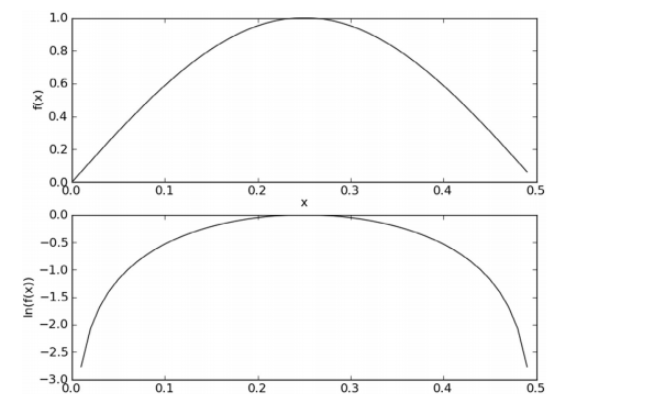

检查这两条直线就会发现他们在相同区域内同时增加或者减小，并且在相同带你取到极值。他们的值虽然不停，但不影响最终结果。

### 朴素贝叶斯分类函数

In [5]:
import numpy as np
def trainNB0(trainMatrix,trainCategory):
    '''
    函数功能：
            利用朴素贝叶斯训练算法
    函数参数：
            trainMatrix__文档矩阵
            trainCategory__每篇文档类别标签所构成的向量
    函数返回：
            p0v__非侮辱类的条件概率
            p1v__侮辱类的条件概率
            pAb__文档属于侮辱类的概率
    '''
    numTrainDocs = len(trainMatrix)                       #计算训练的文档数目
    numWords = len(trainMatrix[0])                        #计算每篇文档的词条数
    pAbusive = sum(trainCategory)/float(numTrainDocs)     #文档属于侮辱类的概率
    p0Num = np.ones(numWords)
    p1Num = np.ones(numWords)                             # 创建一个长度和词条数等长的列表
    p0Denom = 2.0                                         # 分母初始化为0
    p1Denom = 2.0                                         # 分母初始化为0
    for i in range(numTrainDocs):                         # 遍历每一篇文档的词条向量
        if trainCategory[i] == 1:                         # 如果该词条向量对应的标签为1
            p1Num += trainMatrix[i]                       # 统计所有文档中类别标签为1的词条向量中各个词条出现的次数
            p1Denom += sum(trainMatrix[i])                # 统计所以文档类别标签为1的词条向量中出现的所有词条的数目
        
         # 统计属于侮辱类的条件概率所需的数据
        else:                     
            p0Num += trainMatrix[i]                       # 统计所有文档中类别标签为0的词条向量中各个词条出现的次数
            p0Denom += sum(trainMatrix[i])                # 统计所以文档类别标签为0的词条向量中出现的所有词条的数目
    p1Vect = np.log(p1Num/p1Denom)                        # 为避免下溢出问题，后面会改为np.log()                   
    p0Vect = np.log(p0Num/p0Denom)                        # 为避免下溢出问题，后面会改为log()
    return p0Vect,p1Vect,pAbusive                         # 函数返回


# 函数测试
postingList, classVec = loadDataSet()
myVocabList = createVocabList(postingList)
trainMat = []                                             # 创建一个生成训练集向量列表
for postinDoc in postingList:
    trainMat.append(setofWords2Vec(myVocabList, postinDoc))
p0V, p1V, pAb = trainNB0(trainMat, classVec)

print(p1V)
print('\n')
print(p0V)
print('\n')
print(pAb)

[-2.35137526 -3.04452244 -2.35137526 -2.35137526 -2.35137526 -1.94591015
 -2.35137526 -3.04452244 -2.35137526 -3.04452244 -3.04452244 -2.35137526
 -1.94591015 -3.04452244 -3.04452244 -3.04452244 -3.04452244 -3.04452244
 -3.04452244 -3.04452244 -3.04452244 -2.35137526 -3.04452244 -2.35137526
 -2.35137526 -1.65822808 -3.04452244 -3.04452244 -3.04452244 -2.35137526
 -2.35137526 -3.04452244]


[-3.25809654 -2.56494936 -3.25809654 -3.25809654 -2.56494936 -2.56494936
 -3.25809654 -2.56494936 -2.15948425 -2.56494936 -2.56494936 -3.25809654
 -3.25809654 -2.56494936 -2.56494936 -2.56494936 -2.56494936 -2.56494936
 -2.56494936 -2.56494936 -1.87180218 -3.25809654 -2.56494936 -3.25809654
 -3.25809654 -3.25809654 -2.56494936 -2.56494936 -2.56494936 -3.25809654
 -2.56494936 -2.56494936]


0.5


通过上面的结果可以看到，没有了0概率的现象。

In [6]:
def classifyNB(vec2Classify, p0Vec, p1Vec, pClass1):
    '''
    函数功能：
            朴素贝叶斯分类器分类函数
    函数参数：
            vec2Classify__待分类的词条数组
            p0Vec__非侮辱类的条件概率数组
            p1Vec__侮辱类的条件概率数组
            pClass1__文档属于侮辱类的概率
    '''
    p1 = sum(vec2Classify * p1Vec) + np.log(pClass1)      #element-wise mult
    p0 = sum(vec2Classify * p0Vec) + np.log(1.0 - pClass1)
    if p1 > p0:
        return 1
    else: 
        return 0

In [7]:
def classifyNB(vec2Classify, p0Vec, p1Vec, pClass1):
    '''
    函数功能：
            朴素贝叶斯分类器分类函数
    函数参数：
            vec2Classify__待分类的词条数组
            p0Vec__非侮辱类的条件概率数组
            p1Vec__侮辱类的条件概率数组
            pClass1__文档属于侮辱类的概率
    函数返回：
            1__侮辱类
            0__非侮辱类
    '''
    p1 = sum(vec2Classify * p1Vec) + np.log(pClass1)      # 这里的相乘指的是对应元素相乘
    p0 = sum(vec2Classify * p0Vec) + np.log(1.0 - pClass1)
    if p1 > p0:
        return 1
    else: 
        return 0

In [8]:
def testingNB():
    '''
    函数说明：
            朴素贝叶斯测试函数
    函数返回：
            测试样本的类别
    '''
    listOPosts,listClasses = loadDataSet()          # 使用loadDataSet()函数创建数据集
    myVocabList = createVocabList(listOPosts)       # 使用createVocabList()函数创建词汇表
    trainMat=[]                                     # 将数据集进行向量化
    for postinDoc in listOPosts:      
        trainMat.append(setofWords2Vec(myVocabList, postinDoc))
    p0V,p1V,pAb = trainNB0(np.array(trainMat),np.array(listClasses))  # 训练朴素贝叶斯分类器
    
    testEntry = ['love', 'my', 'dalmation']                           # 测试样本1
    thisDoc = np.array(setofWords2Vec(myVocabList, testEntry))        # 测试样本1向量化 
    print(testEntry,'classified as: ',classifyNB(thisDoc,p0V,p1V,pAb))# 打印分类结果
    
    testEntry = ['stupid', 'garbage']                                 # 测试样本2
    thisDoc = np.array(setofWords2Vec(myVocabList, testEntry))        # 测试样本2向量化 
    print(testEntry,'classified as: ',classifyNB(thisDoc,p0V,p1V,pAb))# 打印分类结果

    # 函数测试
testingNB()

['love', 'my', 'dalmation'] classified as:  0
['stupid', 'garbage'] classified as:  1


## 使用朴素贝叶斯过滤垃圾邮件

在前面那个简单的例子中，我们引入了字符串列表。使用朴素贝叶斯解决一些现实生活中的问题时，需要先从文本内容得到字符串列表，然后生成词向量。下面这个例子中，我们将了解朴素贝叶斯的一个最著名的应用：电子邮件垃圾过滤。首先看一下如何使用通用框架来解决该问题。

示例：使用朴素贝叶斯对电子邮件进行分类
- (1) 收集数据：提供文本文件。
- (2) 准备数据：将文本文件解析成词条向量。
- (3) 分析数据：检查词条确保解析的正确性。
- (4) 训练算法：使用我们之前建立的trainNB0()函数。
- (5) 测试算法：使用classifyNB()，并且构建一个新的测试函数来计算文档集的错误率。
- (6) 使用算法：构建一个完整的程序对一组文档进行分类，将错分的文档输出到屏幕上。

### 准备数据：切分数据

所有的邮件文本数据放在email文件夹下，这个文件夹下面包含两个文件夹：ham和spam，ham文件夹下放置25个txt格式的非垃圾邮件，spam文件夹下放置了25个txt格式的垃圾邮件

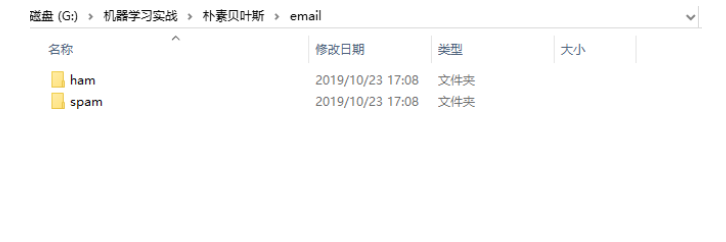


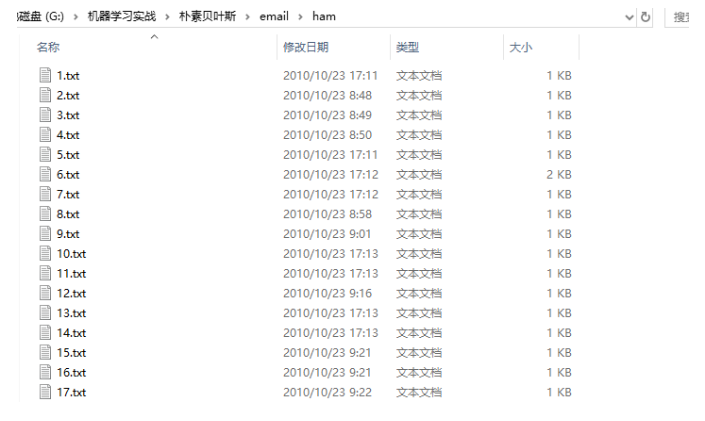

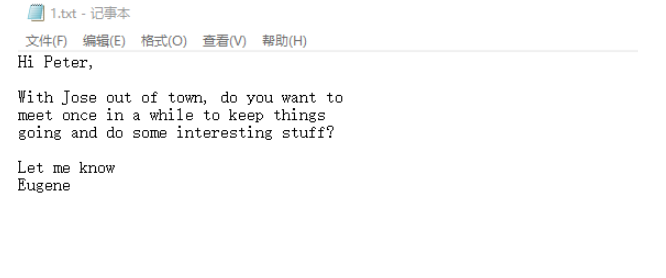

对于一个文本字符串，可以使用Python的string.split()方法将其切分，下面看看实际的运行效果。

In [9]:
mySent = "This book is the best book on Python or M.L. I have ever laid eyes upon."
print(mySent.split())

['This', 'book', 'is', 'the', 'best', 'book', 'on', 'Python', 'or', 'M.L.', 'I', 'have', 'ever', 'laid', 'eyes', 'upon.']


可以看到，切分的结果不错，但是标点符号也被当成了词的一部分。可以使用正则表达式来且切分句子，其中分隔符是除单词、数字外的任意字符串。

In [10]:
import re                            # 导入re模块

regEx = re.compile('\\W+')           # 根据包含的正则表达式的字符串创建模式对象 
listOfTokens = regEx.split(mySent)
print(listOfTokens)

['This', 'book', 'is', 'the', 'best', 'book', 'on', 'Python', 'or', 'M', 'L', 'I', 'have', 'ever', 'laid', 'eyes', 'upon', '']


现在得到了一系列词组成的词表，但是里面的空字符串需要去掉。可以计算每个字符串的长度，只返回长度大于0的字符串。

In [11]:
[tok  for tok in listOfTokens if len(tok)>0]  # 字符串全部转化为小写

['This',
 'book',
 'is',
 'the',
 'best',
 'book',
 'on',
 'Python',
 'or',
 'M',
 'L',
 'I',
 'have',
 'ever',
 'laid',
 'eyes',
 'upon']

我们发现句子中的第一个单词是大写的，如果目的是句子查找，那么这个特点会很有用。但这里的文本只看成词袋，所以我们希望所有的词的形式都是统一的，不论它们出现在句子中间、结尾还是开头。

.lower()__可将字符串全部转换为小写

.upper()__可将自父亲全部转化为大写

In [12]:
[tok.lower() for tok in listOfTokens if len(tok)>0]  # 字符串全部转换为小写

['this',
 'book',
 'is',
 'the',
 'best',
 'book',
 'on',
 'python',
 'or',
 'm',
 'l',
 'i',
 'have',
 'ever',
 'laid',
 'eyes',
 'upon']

### 测试算法：使用朴素贝叶斯进行交叉验证

下面将文本解析器集成到一个完整分类器中。

In [13]:
def textParse(bigString):
    '''
    函数说明：
            将输入的字符串切分为列表
    函数参数：
            bigString__输入的字符串
    返回：
        切分后的列表
    '''

    listOfTokens = re.split(r'\W+', bigString)
    return [tok.lower() for tok in listOfTokens if len(tok)>2]  #除了单个字母，其它单词变成小写

# 函数测试 
textParse(mySent)

['this',
 'book',
 'the',
 'best',
 'book',
 'python',
 'have',
 'ever',
 'laid',
 'eyes',
 'upon']

In [14]:
import random
def spamTest():
    '''
    函数说明：
            测试朴素贝叶斯分类器
    '''
    docList = [] 
    classList = [] 
    fullText = []
    for i in range(1, 26):                                              # 遍历25个txt文件
        wordList = textParse(open('email/spam/%d.txt' %i, 'r').read())  # 获取25个垃圾邮件，并调用textParse函数将字符串进行切分
        docList.append(wordList)                                        # append() 方法向列表的尾部添加一个新的元素  
        fullText.append(wordList)                                       # extend()方法将元素都添加到原有的列表 
        classList.append(1)                                             # 标记垃圾邮件，1表示垃圾文件
        wordList = textParse(open('email/ham/%d.txt' %i, 'r').read())   # 获取25个非件，并调用textParse函数将字符串进行切分
        docList.append(wordList)                                        # append() 方法向列表的尾部添加一个新的元素 
        fullText.append(wordList)                                       # extend()方法将元素都添加到原有的列表  
        classList.append(0)                                             # 标记非垃圾邮件，0表示非垃圾邮件 
    
    vocabList = createVocabList(docList)        # 创建一个不重复词的词表
    trainingSet = list(range(50))               # 创建存储训练集的索引值列表  
    testSet = []                                # 创建测试集的索引值列表
    for i in range(10):                         # 从50个邮件中随机选择10个邮件当做测试集(40个邮件当做训练集)
        randIndex = int(random.uniform(0, len(trainingSet)))            # 随机选取索引值
        testSet.append(trainingSet[randIndex])                          # 添加测试集的索引值   
        del(trainingSet[randIndex])                                     # 在训练集中删除添加到测试集的索引值
    
    trainMat = []                               # 创建训练矩阵  
    trainClasses = []                           # 创建训练集类别标签           
    for docIndex in trainingSet:                                           # 遍历训练集
        trainMat.append(setofWords2Vec(vocabList, docList[docIndex]))      # 将向量化后的词添加至训练矩阵中
        trainClasses.append(classList[docIndex])                           # 将类别标签添加至训练集类别标签中
    p0V, p1V, pSpam = trainNB0(np.array(trainMat), np.array(trainClasses)) # 训练朴素贝叶斯模型
    errorCount = 0                                                         # 错误分类计数(设初始值为0)  
    for docIndex in testSet:                                               # 遍历测试集
        wordVector = setofWords2Vec(vocabList, docList[docIndex])          # 将测试集进行向量化
        if classifyNB(np.array(wordVector), p0V, p1V, pSpam) != classList[docIndex]:   #如果分类错误
            errorCount += 1                                                # 错误计数加1
            print("分类错误的测试集：",docList[docIndex])      
    print('the error rate is:' ,float(errorCount) / len(testSet))

spamTest()

分类错误的测试集： ['home', 'based', 'business', 'opportunity', 'knocking', 'your', 'door', 'don抰', 'rude', 'and', 'let', 'this', 'chance', 'you', 'can', 'earn', 'great', 'income', 'and', 'find', 'your', 'financial', 'life', 'transformed', 'learn', 'more', 'here', 'your', 'success', 'work', 'from', 'home', 'finder', 'experts']
the error rate is: 0.1


函数spamTest()会输出在10封随机选择的电子邮件上的分类错误概率，所以存在误判的情况。这里一直出现的错误是将垃圾邮件误判为正常邮件。相比之下，将垃圾邮件误判为正常邮件要比将正常邮件归为垃圾邮件好。为了避免错误，有多种方式可以用来修正分类器，这些内容会在后续文章中进行讨论。